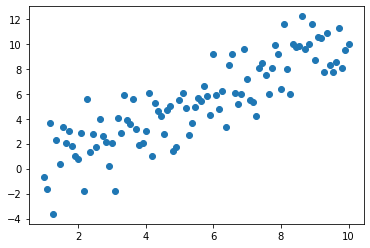

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(1, 10, 100)
y = np.random.randn(100)*2 + X

plt.scatter(X, y)

### Calculating the Normal Equation: θ = (X.T * X)^-1 * X.T * y

In [61]:
# np.linalg.inv(X.T*X) produces error because only 1D
# So we will create X_b. Also, calculate dot product!
X_b = np.c_[np.ones((len(X), 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta  # Where theta[0] is b and theta[1] is m

array([-0.8097476 ,  1.11343937])

#### After calculating theta, y_predict = θ * X

In [44]:
X_test = np.array([[0], [11]])
X_test_b = np.c_[np.ones((2, 1)), X_test]
y_predict = X_test_b.dot(theta)
y_predict

array([-0.8097476 , 11.43808548])

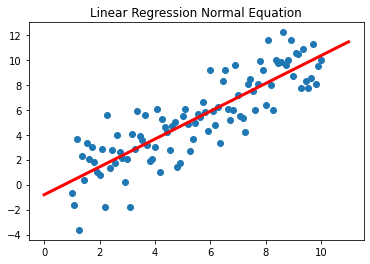

In [62]:
plt.title("Linear Regression Normal Equation")
plt.scatter(X, y)
plt.plot(X_test, y_predict, c="red", lw=3)

#### To further illustrate theta, another way to plot the linear regression is such

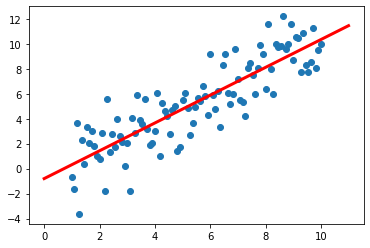

In [65]:
plt.scatter(X, y)
plt.plot([0, 11], (np.array([0, 11])*1.1134 + -0.8), c="red", lw=3)

#### Initializing hyperparameters for the usually optimal way of creating a regression model: Gradient Descent

In [2]:
epochs = 200
L = 0.01
n = float(len(X))
# Initialize slope and y-intercept
m, b = 0.1, 0.1

### Using Batch Gradient Descent

In [3]:
for epoch in range(epochs):
    y_pred = m*X + b
    Dm = -2/n * sum(X * (y - y_pred))
    Db = -2/n * sum(y - y_pred)
    m = m - Dm*L
    b = b - Db*L

print("Slope:", m)
print("Y-intercept:", b)

Slope: 1.0388014717611704
Y-intercept: -0.3082497416330018


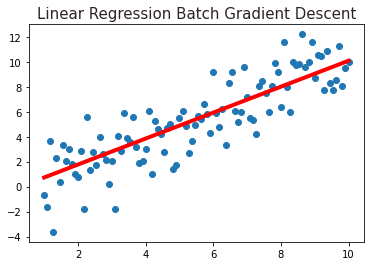

In [4]:
y_predictions = m*X + b
plt.title("Linear Regression Batch Gradient Descent", fontdict={"fontsize": 15, "color":"#2e2322"})
plt.scatter(X, y)
plt.plot(X, y_predictions, c="red", lw=4)

### Using Stochasitc Gradient Descent

In [5]:
# Re-initializing paramaters because SGD is faster
epochs = 1000
L = 0.01
n = float(len(X))
m, b = 0.1, 0.1

for epoch in range(epochs):
    randIdx = np.random.randint(1, len(X))
    y_pred = m*X + b
    # Since there is only one value needed for X, y, and y_pred,
    # taking the sum is unnecessary- in fact, impossible.
    Dm = -2/n * (X[randIdx] * (y[randIdx] - y_pred[randIdx]))
    Db = -2/n * (y[randIdx] - y_pred[randIdx])
    m = m - Dm*L
    b = b - Db*L

print("Slope:", m)
print("Y-intercept:", b)

Slope: 0.9774718571457809
Y-intercept: 0.19893681358424134


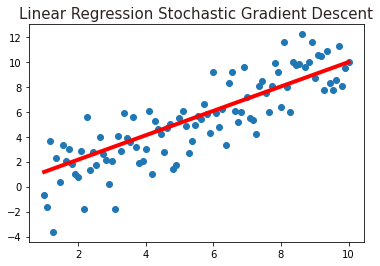

In [6]:
y_predictions = m*X + b
plt.title("Linear Regression Stochastic Gradient Descent", fontdict={"fontsize": 15, "color":"#2e2322"})
plt.scatter(X, y)
plt.plot(X, y_predictions, c="red", lw=4)